In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import linalg as LA 

## importando o arquivo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Ufop/Ufop2020_1/Avaliação_Sistemas/Provas/Prova_3/log.csv', header=0, sep='\t')

## Criando a amostra

In [5]:
sample = df.sample(10000)
sample.head()

,type,size,time
67526,.tar.gz,816.03,2.31
3160,.ps,163.00,0.42
136019,.ps,179.00,0.44
120211,.tar.gz,1091.88,2.75
160350,.tar.gz,1069.31,2.71


In [10]:
sample2=sample[sample['type'] == '.ps']
sample2.head()

,type,size,time
3160,.ps,163.00,0.42
136019,.ps,179.00,0.44
149441,.ps,530.00,0.91
20266,.ps,43.53,0.14
118584,.ps,38.40,0.14


In [11]:
sample3=sample[sample['type'] == '.tar.gz']
sample3.head()

,type,size,time
67526,.tar.gz,816.03,2.31
120211,.tar.gz,1091.88,2.75
160350,.tar.gz,1069.31,2.71
115129,.tar.gz,15827.45,5.55
58265,.tar.gz,1012.36,2.62


## (a) informações básicas de estatísticas de cada ***feature***

In [12]:
sample2.describe()

,size,time
count,3970.000000,3970.000000
mean,293.296537,0.567856
std,174.951915,0.266940
min,31.040000,0.130000
25%,136.000000,0.380000
50%,291.000000,0.590000
75%,448.000000,0.800000
max,599.000000,1.000000


In [55]:
sample3.describe()

,size,time
count,6030.000000,6030.000000
mean,5919.076940,3.397589
std,11477.298564,1.284098
min,687.760000,2.100000
25%,1017.750000,2.630000
50%,1148.840000,2.840000
75%,1382.462500,3.210000
max,138497.000000,9.850000


In [14]:
print('Variância')
sample2.var()

Variância


size    30608.172415
time        0.071257
dtype: float64

In [56]:
print('Variância')
sample3.var()

Variância


size    1.317284e+08
time    1.648907e+00
dtype: float64

In [15]:
print('Coeficiente de variação')
sample2.std()/sample2.mean()

Coeficiente de variação


size    0.596502
time    0.470084
dtype: float64

In [57]:
print('Coeficiente de variação')
sample3.std()/sample3.mean()

Coeficiente de variação


size    1.939035
time    0.377944
dtype: float64

In [17]:
print('Soma')
sample2[['size', 'time']].sum()

Soma


size    1164387.25
time       2254.39
dtype: float64

In [58]:
print('Soma')
sample3[['size', 'time']].sum()

Soma


size    35692033.95
time       20487.46
dtype: float64

In [60]:
print('Range')
sample2[['size', 'time']].max()-sample2[['size', 'time']].min()

Range


size    567.96
time      0.87
dtype: float64

In [61]:
print('Range')
sample3[['size', 'time']].max()-sample3[['size', 'time']].min()

Range


size    137809.24
time         7.75
dtype: float64

## (b) gráficos das ***features***

In [19]:
plt.figure(figsize=(9,6))
# plt.style.use('ggplot')

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

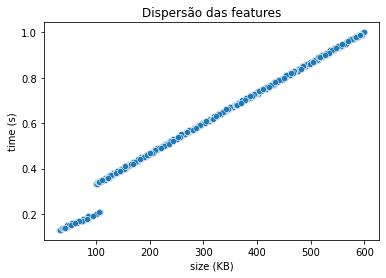

In [21]:
sns.scatterplot('size', 'time', data=sample2)
plt.title('Dispersão das features')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

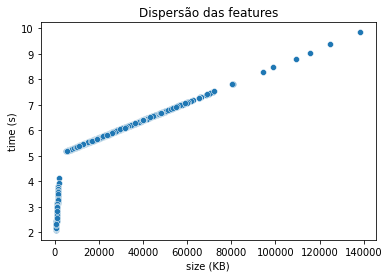

In [62]:
sns.scatterplot('size', 'time', data=sample3)
plt.title('Dispersão das features')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

Text(0.5, 0, 'time (s)')

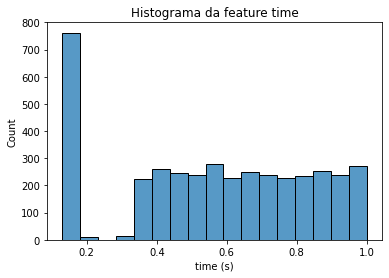

In [23]:
sns.histplot(sample2, x='time')
plt.title('Histograma da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

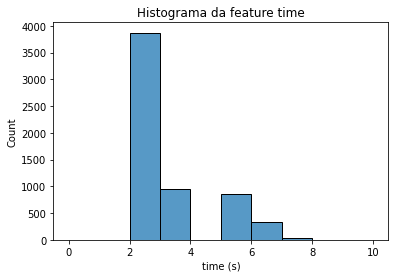

In [64]:
sns.histplot(sample3, x='time',bins=[0,2,3,4,5,6,7,8,9,10])
plt.title('Histograma da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'size (KB)')

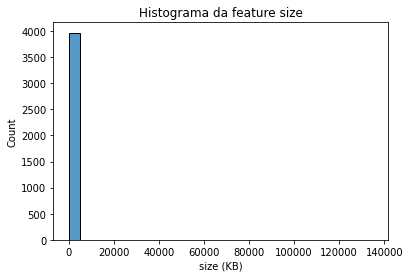

In [26]:
sns.histplot(sample2, x='size',bins=[x for x in range(0,140000,5000)])
plt.title('Histograma da feature size')
plt.xlabel('size (KB)')

Text(0.5, 0, 'size (KB)')

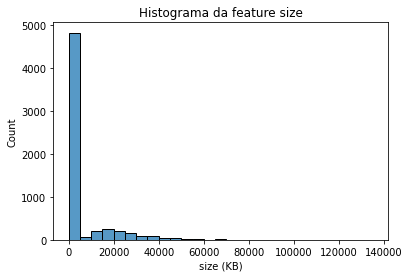

In [65]:
sns.histplot(sample3, x='size',bins=[x for x in range(0,140000,5000)])
plt.title('Histograma da feature size')
plt.xlabel('size (KB)')

Text(0.5, 0, 'time (s)')

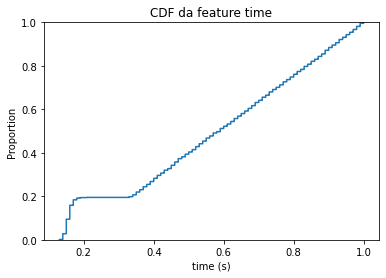

In [27]:
sns.ecdfplot(sample2, x='time')
plt.title('CDF da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'time (s)')

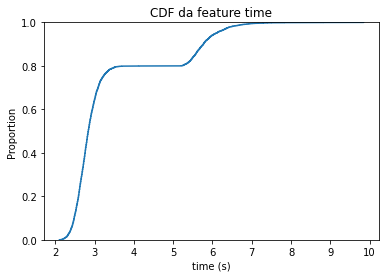

In [66]:
sns.ecdfplot(sample3, x='time')
plt.title('CDF da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'size (KB)')

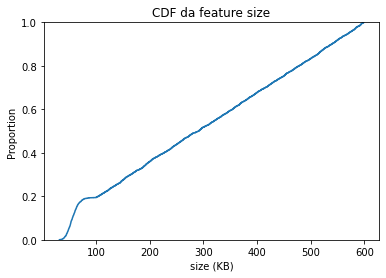

In [28]:
sns.ecdfplot(sample2, x='size')
plt.title('CDF da feature size')
plt.xlabel('size (KB)')

Text(0.5, 0, 'size (KB)')

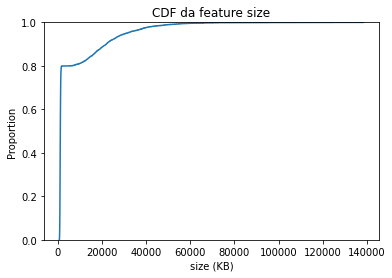

In [67]:
sns.ecdfplot(sample3, x='size')
plt.title('CDF da feature size')
plt.xlabel('size (KB)')

Text(0.5, 1.0, 'Boxplot da feature time')

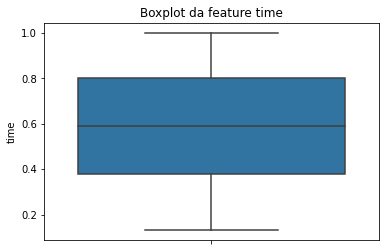

In [29]:
sns.boxplot(y=sample2['time'])
plt.title('Boxplot da feature time')

Text(0.5, 1.0, 'Boxplot da feature time')

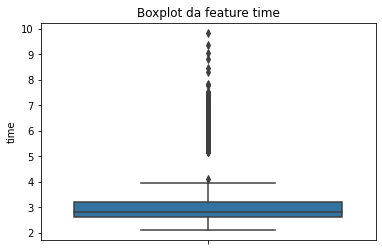

In [68]:
sns.boxplot(y=sample3['time'])
plt.title('Boxplot da feature time')

Text(0.5, 1.0, 'Boxplot da feature size')

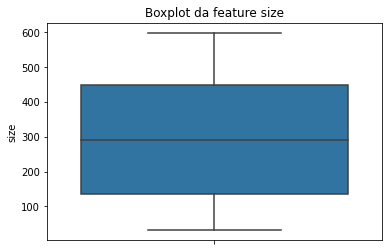

In [30]:
sns.boxplot(y=sample2['size'])
plt.title('Boxplot da feature size')

Text(0.5, 1.0, 'Boxplot da feature size')

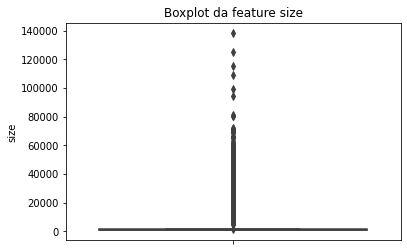

In [69]:
sns.boxplot(y=sample3['size'])
plt.title('Boxplot da feature size')

## análise de transformação de dados

In [31]:
sample2.min()

type      .ps
size    31.04
time     0.13
dtype: object

In [70]:
sample3.min()

type    .tar.gz
size     687.76
time        2.1
dtype: object

In [32]:
sample2.max()

type    .ps
size    599
time      1
dtype: object

In [71]:
sample3.max()

type    .tar.gz
size     138497
time       9.85
dtype: object

In [72]:
2.1/138497

1.5162783309385764e-05

In [33]:
0.13/599

0.00021702838063439065

In [34]:
599/0.13

4607.692307692308

In [73]:
138497/2.1

65950.95238095238

In [35]:
import math

In [37]:
transformed_sample2 = sample2[['size', 'time']].applymap(lambda x: math.log10(x))
transformed_sample2

,size,time
3160,2.212188,-0.376751
136019,2.252853,-0.356547
149441,2.724276,-0.040959
20266,1.638789,-0.853872
118584,1.584331,-0.853872
...,...,...
165374,2.161368,-0.408935
139369,2.737987,-0.031517
107080,2.654177,-0.096910
14374,2.187521,-0.387216


In [74]:
transformed_sample3 = sample3[['size', 'time']].applymap(lambda x: math.log10(x))
transformed_sample3

,size,time
67526,2.911706,0.363612
120211,3.038175,0.439333
160350,3.029104,0.432969
115129,4.199411,0.744293
58265,3.005335,0.418301
...,...,...
111439,3.089145,0.471292
65696,2.986996,0.406540
31524,4.603596,0.806180
95454,3.096392,0.477121


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

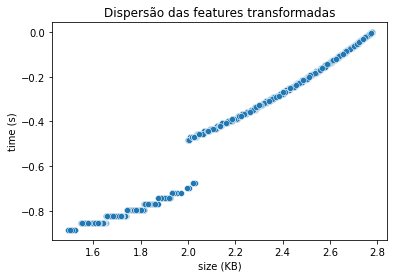

In [38]:
sns.scatterplot('size', 'time', data=transformed_sample2)
plt.title('Dispersão das features transformadas')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

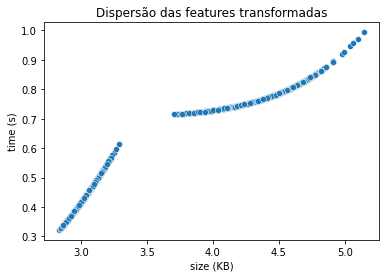

In [75]:
sns.scatterplot('size', 'time', data=transformed_sample3)
plt.title('Dispersão das features transformadas')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

## Principal Component Analysis (PCA)

### 1º passo - cálculo da média e desvio padrão

In [39]:
transformed_sample2.describe()

,size,time
count,3970.000000,3970.000000
mean,2.352297,-0.314650
std,0.355782,0.271090
min,1.491922,-0.886057
25%,2.133539,-0.420216
50%,2.463893,-0.229148
75%,2.651278,-0.096910
max,2.777427,0.000000


In [76]:
transformed_sample3.describe()

,size,time
count,6030.000000,6030.000000
mean,3.301607,0.506831
std,0.533949,0.136677
min,2.837437,0.322219
25%,3.007641,0.419956
50%,3.060260,0.453318
75%,3.140653,0.506505
max,5.141440,0.993436


### 2º passo - normalização dos dados para média 0 e desvio padrão 1

In [40]:
normalized_sample2 = (transformed_sample2-transformed_sample2.mean())/transformed_sample2.std()
normalized_sample2.describe()

,size,time
count,3.970000e+03,3.970000e+03
mean,-6.602108e-15,1.627156e-14
std,1.000000e+00,1.000000e+00
min,-2.418270e+00,-2.107813e+00
25%,-6.148677e-01,-3.894154e-01
50%,3.136629e-01,3.154003e-01
75%,8.403485e-01,8.032014e-01
max,1.194917e+00,1.160684e+00


In [77]:
normalized_sample3 = (transformed_sample3-transformed_sample3.mean())/transformed_sample3.std()
normalized_sample3.describe()

,size,time
count,6.030000e+03,6.030000e+03
mean,1.456687e-14,2.973814e-15
std,1.000000e+00,1.000000e+00
min,-8.693140e-01,-1.350711e+00
25%,-5.505494e-01,-6.356222e-01
50%,-4.520036e-01,-3.915247e-01
75%,-3.014392e-01,-2.384062e-03
max,3.445708e+00,3.560250e+00


### 3º passo - Correlação entre as variáveis

In [41]:
correlation2 = normalized_sample2.corr()
correlation2

,size,time
size,1.00000,0.99303
time,0.99303,1.00000


In [78]:
correlation3 = normalized_sample3.corr()
correlation3

,size,time
size,1.000000,0.983184
time,0.983184,1.000000


### 4º passo - Matriz de correlação

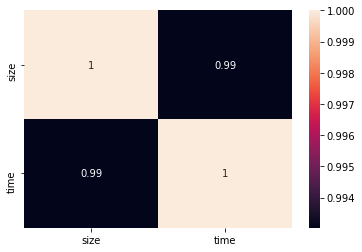

In [42]:
sns.heatmap(correlation2, 
        xticklabels=correlation2.columns,
        yticklabels=correlation2.columns,
        annot=True)

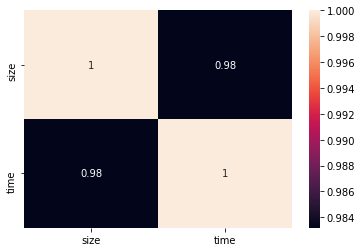

In [79]:
sns.heatmap(correlation3, 
        xticklabels=correlation3.columns,
        yticklabels=correlation3.columns,
        annot=True)

### 5º passo - Cálculo dos autovalores

In [43]:
eigenvalues2, eigenvectors2 = LA.eig(correlation2)
eigenvalues2

array([1.99302985, 0.00697015])

In [80]:
eigenvalues3, eigenvectors3 = LA.eig(correlation3)
eigenvalues3

array([1.98318397, 0.01681603])

### 6º passo - Cálculo dos autovetores

In [44]:
eigenvectors2

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [81]:
eigenvectors3

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### 7º passo - Cálculo dos fatores principais

In [45]:
principal_factor2 = np.matmul(normalized_sample2,eigenvectors2)
principal_factor2

,size,time
3160,-0.440448,0.116482
136019,-0.306928,0.088359
149441,1.453189,-0.025406
20266,-2.824579,0.011582
118584,-2.932812,0.119815
...,...,...
165374,-0.625401,0.133534
139369,1.505068,-0.028030
107080,1.167926,-0.032028
14374,-0.516770,0.138209


In [82]:
principal_factor3 = np.matmul(normalized_sample3,eigenvectors3)
principal_factor3

,size,time
67526,-1.257293,-0.224607
120211,-0.698067,-0.000344
160350,-0.743001,-0.021252
115129,2.417480,0.039564
58265,-0.850363,-0.065661
...,...,...
111439,-0.465225,0.097498
65696,-0.935497,-0.102221
31524,3.272916,-0.175521
95454,-0.425469,0.118061


### 8º passo - Soma e soma dos quadrados do principal fator

In [46]:
sum_pf2 = principal_factor2.sum()
sum_pf2

size    2.709433e-11
time    6.413137e-11
dtype: float64

In [83]:
sum_pf3 = principal_factor3.sum()
sum_pf3

size    7.522749e-11
time   -4.959116e-11
dtype: float64

In [47]:
sum_square_pf2 = (principal_factor2**2).sum()
sum_square_pf2

size    7910.335474
time      27.664526
dtype: float64

In [84]:
sum_square_pf3 = (principal_factor3**2).sum()
sum_square_pf3

size    11956.616181
time      101.383819
dtype: float64

In [48]:
sum_total2 = sum_square_pf2.sum()
sum_total2

7938.00000000005

In [85]:
sum_total3 = sum_square_pf3.sum()
sum_total3

12057.999999999924

In [49]:
size_impact2 = sum_square_pf2['size']/sum_total2
size_impact2

0.9965149249663179

In [86]:
size_impact3 = sum_square_pf3['size']/sum_total3
size_impact3

0.991591987137214

In [50]:
time_impact2 = sum_square_pf2['time']/sum_total2
time_impact2

0.0034850750336821654

In [87]:
time_impact3 = sum_square_pf3['time']/sum_total3
time_impact3

0.008408012862786026

In [88]:
def applyPercentage(l):
	return list( map(lambda x: x * 100, l) )
 
percentages2 = applyPercentage([size_impact2, time_impact2])
percentages2

[99.65149249663179, 0.34850750336821656]

In [89]:
def applyPercentage(l):
	return list( map(lambda x: x * 100, l) )
 
percentages3 = applyPercentage([size_impact3, time_impact3])
percentages3

[99.1591987137214, 0.8408012862786026]

([<matplotlib.patches.Wedge at 0x7f475575e978>,
 [Text(-0.01313819307423245, -1.199928076129042, 'size'),
  Text(0.01204337341997788, 1.099934069459014, 'time')],
 [Text(-0.007663945959968928, -0.6999580444086079, '99.7%'),
  Text(0.006569112774533388, 0.5999640378867349, '0.3%')])

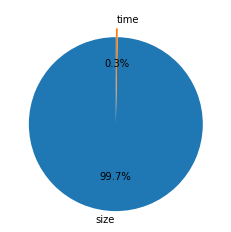

In [90]:
explode = (0.1,0)
plt.pie(percentages2,labels=['size', 'time'],explode=explode,autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7f4755725940>,
 [Text(-0.03169398968016584, -1.199581381573653, 'size'),
  Text(0.029053020128603876, 1.0996162612572657, 'time')],
 [Text(-0.018488160646763407, -0.699755805917964, '99.2%'),
  Text(0.015847101888329385, 0.5997906879585085, '0.8%')])

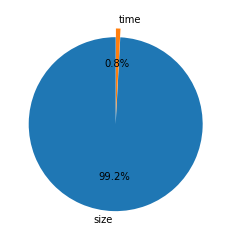

In [91]:
explode = (0.1,0)
plt.pie(percentages3,labels=['size', 'time'],explode=explode,autopct='%1.1f%%', startangle=90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


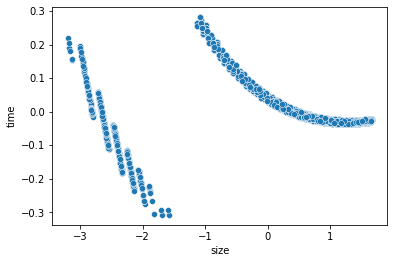

In [53]:
sns.scatterplot( 'size','time', data=principal_factor2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


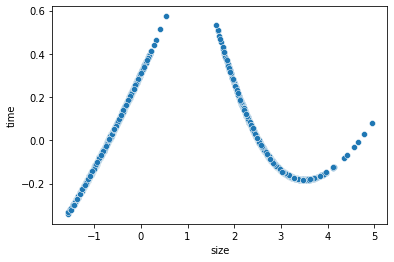

In [92]:
sns.scatterplot( 'size','time', data=principal_factor3)

[0.99676113 0.00323887]


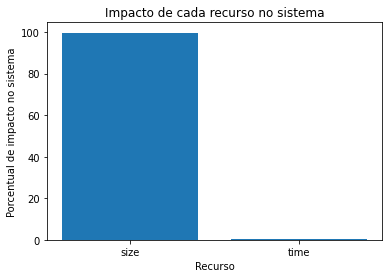

<Figure size 432x288 with 0 Axes>

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(transformed_sample2)
percentages = pca.explained_variance_ratio_
print(percentages)

plt.clf()
plt.bar(['size', 'time'], applyPercentage(percentages) )
plt.xlabel('Recurso')
plt.ylabel('Porcentual de impacto no sistema')
plt.title('Impacto de cada recurso no sistema')
plt.show()
plt.clf()


[0.99807162 0.00192838]


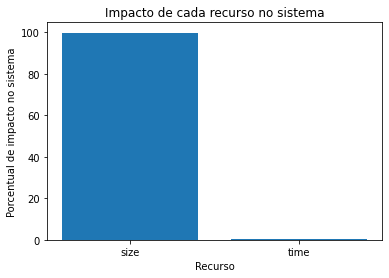

<Figure size 432x288 with 0 Axes>

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(transformed_sample3)
percentages = pca.explained_variance_ratio_
print(percentages)

plt.clf()
plt.bar(['size', 'time'], applyPercentage(percentages) )
plt.xlabel('Recurso')
plt.ylabel('Porcentual de impacto no sistema')
plt.title('Impacto de cada recurso no sistema')
plt.show()
plt.clf()


## Análise para clusterização

### selecão das ***features*** que mais influenciam no sistema através da análise do PCA

In [96]:
df_cluster2 = transformed_sample2[['size','time']]
df_cluster2.head()

,size,time
3160,2.212188,-0.376751
136019,2.252853,-0.356547
149441,2.724276,-0.040959
20266,1.638789,-0.853872
118584,1.584331,-0.853872


In [99]:
df_cluster3 = transformed_sample3[['size','time']]
df_cluster3.head()

,size,time
67526,2.911706,0.363612
120211,3.038175,0.439333
160350,3.029104,0.432969
115129,4.199411,0.744293
58265,3.005335,0.418301


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


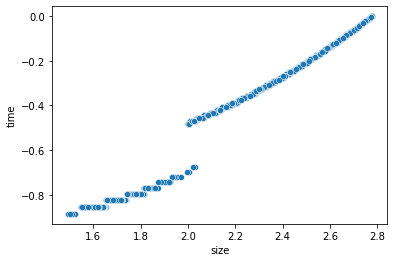

In [ ]:
sns.scatterplot('size', 'time', data=df_cluster2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


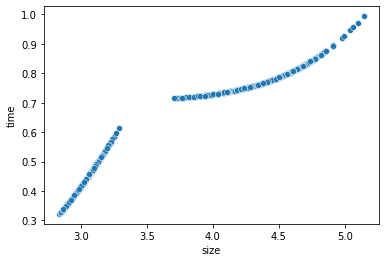

In [100]:
sns.scatterplot('size', 'time', data=df_cluster3)

### aplicação da escala nos dados

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [101]:
scaler2 = StandardScaler()
df_scaled2 = scaler2.fit_transform(df_cluster2[['size','time']])

In [102]:
scaler3 = StandardScaler()
df_scaled3 = scaler3.fit_transform(df_cluster3[['size','time']])

In [103]:
df_scaled2[:10]

array([[-0.39385834, -0.2291074 ],
       [-0.27954509, -0.1545715 ],
       [ 1.04565623,  1.00972282],
       [-2.00572134, -1.98934008],
       [-2.15880487, -1.98934008],
       [ 0.89898032,  0.86228712],
       [ 0.23575057,  0.23182626],
       [ 0.58360322,  0.5429094 ],
       [-1.72709044, -1.87879743],
       [-1.8431579 , -1.87879743]])

In [104]:
df_scaled3[:10]

array([[-0.73028049, -1.04794846],
       [-0.49340547, -0.49389166],
       [-0.51039591, -0.54045338],
       [ 1.68158027,  1.73753637],
       [-0.5549144 , -0.64778075],
       [-0.26804659,  0.08548624],
       [-0.40671705, -0.28158837],
       [-0.53910354, -0.61160069],
       [-0.37176524, -0.18576863],
       [-0.511713  , -0.54045338]])

In [105]:
df_2=pd.DataFrame(df_scaled2,columns=['size','time'])

In [108]:
df_3=pd.DataFrame(df_scaled3,columns=['size','time'])

In [106]:
df_2.mean()

size   -3.433022e-16
time   -7.724020e-17
dtype: float64

In [109]:
df_3.mean()

size    4.859665e-16
time   -3.080363e-16
dtype: float64

In [107]:
df_2.std()

size    1.000126
time    1.000126
dtype: float64

In [110]:
df_3.std()

size    1.000083
time    1.000083
dtype: float64

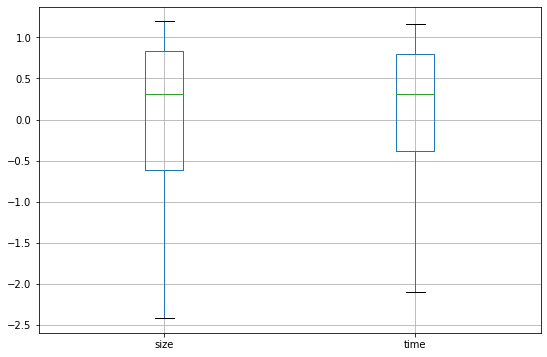

In [112]:
plt.figure(figsize=(9,6))
df_2.boxplot(column=['size','time'])

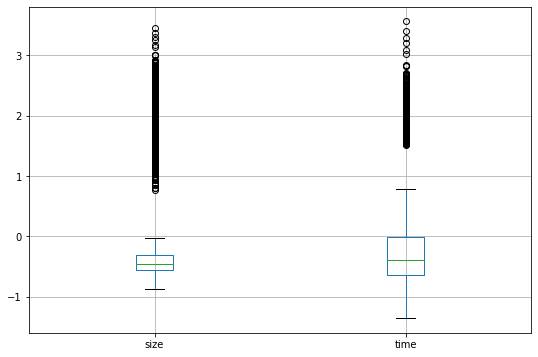

In [113]:
plt.figure(figsize=(9,6))
df_3.boxplot(column=['size','time'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


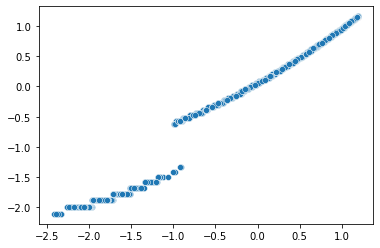

In [114]:
sns.scatterplot(df_scaled2[:,0], df_scaled2[:,1], data=df_cluster2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


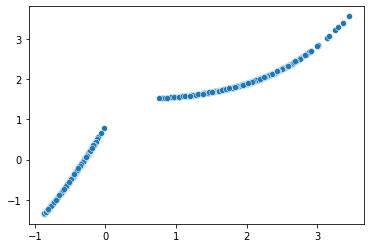

In [115]:
sns.scatterplot(df_scaled3[:,0], df_scaled3[:,1], data=df_cluster3)

### função para calcular a ***distância inter e intra clusters***

In [116]:
def k_intra_distance(data, cx, cy, i_centroid, cluster_labels):
  distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in data[cluster_labels == i_centroid]]
  return np.mean(distances)

In [117]:
def k_inter_distance(centroids):
  total_distances = []
  for (cx, cy) in centroids:
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in centroids]
    total_distances.extend(distances)
  total_distances_filter = list(filter(lambda a: a!=0, total_distances)) #remove os 0's
  return list(dict.fromkeys(total_distances_filter)) #remove as duplicatas

### encontrando o número ***k*** de clusters

In [118]:
inter_distances2 = []
intra_distances2 = []
beta_distances2 = []
clusters_vec2 = []
kmeans_vec2 = []
centroids_vec2 = []
total_clusters = np.arange(3,11)

for i in range(3,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_vec2.append(kmeans)

  clusters = kmeans.fit_predict(df_scaled2)
  clusters_vec2.append(clusters)

  centroids = kmeans.cluster_centers_ 
  centroids_vec2.append(centroids)

  mean_inter_distance = k_inter_distance(centroids)
  df_inter_distance = pd.DataFrame(mean_inter_distance, columns=['distance'])
  cv_inter = df_inter_distance['distance'].std()/df_inter_distance['distance'].mean()
  inter_distances2.append(cv_inter)

  mean_intra_distance = []
  for i, (c_x, c_y) in enumerate(centroids):
    mean_distance = k_intra_distance(df_scaled2, c_x, c_y, i, clusters)
    mean_intra_distance.append(mean_distance)
  df_intra_distance = pd.DataFrame(mean_intra_distance, columns=['distance'])
  cv_intra = df_intra_distance['distance'].std()/df_intra_distance['distance'].mean()
  intra_distances2.append(cv_intra)

  cv_beta = cv_intra/cv_inter
  beta_distances2.append(cv_beta)

In [119]:
inter_distances3 = []
intra_distances3 = []
beta_distances3 = []
clusters_vec3 = []
kmeans_vec3 = []
centroids_vec3 = []
total_clusters = np.arange(3,11)

for i in range(3,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_vec3.append(kmeans)

  clusters = kmeans.fit_predict(df_scaled3)
  clusters_vec3.append(clusters)

  centroids = kmeans.cluster_centers_ 
  centroids_vec3.append(centroids)

  mean_inter_distance = k_inter_distance(centroids)
  df_inter_distance = pd.DataFrame(mean_inter_distance, columns=['distance'])
  cv_inter = df_inter_distance['distance'].std()/df_inter_distance['distance'].mean()
  inter_distances3.append(cv_inter)

  mean_intra_distance = []
  for i, (c_x, c_y) in enumerate(centroids):
    mean_distance = k_intra_distance(df_scaled3, c_x, c_y, i, clusters)
    mean_intra_distance.append(mean_distance)
  df_intra_distance = pd.DataFrame(mean_intra_distance, columns=['distance'])
  cv_intra = df_intra_distance['distance'].std()/df_intra_distance['distance'].mean()
  intra_distances3.append(cv_intra)

  cv_beta = cv_intra/cv_inter
  beta_distances3.append(cv_beta)

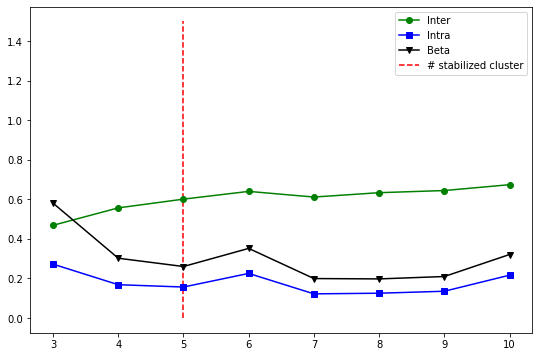

In [121]:
plt.figure(figsize=(9,6))
plt.plot(total_clusters, inter_distances2, marker='o', label='Inter', color='green')
plt.plot(total_clusters, intra_distances2, marker='s', label='Intra', color='blue')
plt.plot(total_clusters, beta_distances2, marker='v', label='Beta', color='black')
plt.vlines(x=5, ymin=0, ymax=1.5, colors='red', linestyles='dashed', label='# stabilized cluster')
plt.legend()

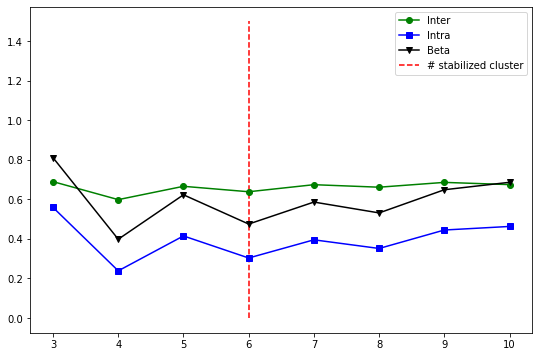

In [123]:
plt.figure(figsize=(9,6))
plt.plot(total_clusters, inter_distances3, marker='o', label='Inter', color='green')
plt.plot(total_clusters, intra_distances3, marker='s', label='Intra', color='blue')
plt.plot(total_clusters, beta_distances3, marker='v', label='Beta', color='black')
plt.vlines(x=6, ymin=0, ymax=1.5, colors='red', linestyles='dashed', label='# stabilized cluster')
plt.legend()

### gráfico da clusterização com o ***k*** ideal nos dados escalados



Text(0, 0.5, 'time')

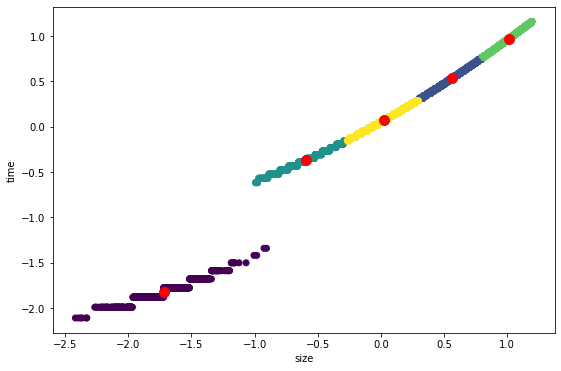

In [125]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled2[:,0], df_scaled2[:,1], c=clusters_vec2[2])
plt.scatter(centroids_vec2[2][:,0], centroids_vec2[2][:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

Text(0, 0.5, 'time')

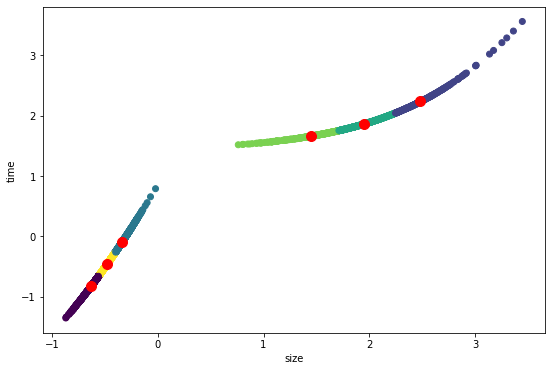

In [126]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled3[:,0], df_scaled3[:,1], c=clusters_vec3[3])
plt.scatter(centroids_vec3[3][:,0], centroids_vec3[3][:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

### gráfico da clusterização com o ***k*** ideal nos dados transformados

Text(0, 0.5, 'time')

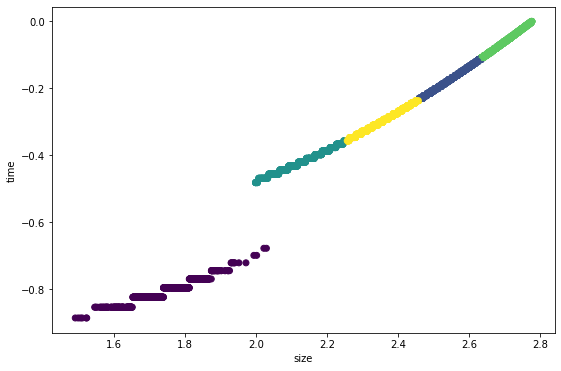

In [128]:
plt.figure(figsize=(9,6))
plt.scatter(df_cluster2['size'], df_cluster2['time'], c=clusters_vec2[2])
# plt.scatter(kmeans_vec[5].cluster_centers_[:,0], kmeans_vec[5].cluster_centers_[:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

Text(0, 0.5, 'time')

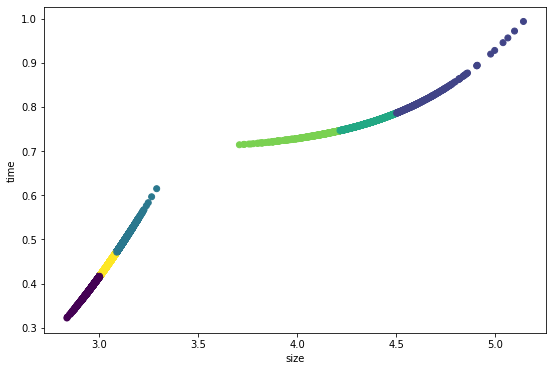

In [129]:
plt.figure(figsize=(9,6))
plt.scatter(df_cluster3['size'], df_cluster3['time'], c=clusters_vec3[3])
# plt.scatter(kmeans_vec[5].cluster_centers_[:,0], kmeans_vec[5].cluster_centers_[:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

### população dos clusters

In [130]:
np.bincount(clusters_vec2[2])

array([ 774,  910,  501, 1086,  699])

In [131]:
np.bincount(clusters_vec3[3])

array([1478,  299, 1193,  578,  333, 2149])

### cálculo dos centróides nos dados originais a partir dos dados escalados

In [132]:
centroids_x2 = 10 ** ((centroids_vec2[2][:,0] * df_cluster2[['size','time']].std()['size']) + df_cluster2[['size','time']].mean()['size'])
centroids_x2

array([ 55.21135232, 357.82359277, 138.08653418, 514.70402676,
       229.63723347])

In [133]:
centroids_x3 = 10 ** ((centroids_vec3[3][:,0] * df_cluster3[['size','time']].std()['size']) + df_cluster3[['size','time']].mean()['size'])
centroids_x3

array([  925.83159748, 42408.89583245,  1327.4405464 , 22111.7006847 ,
       11884.8664889 ,  1109.40612976])

In [134]:
centroids_y2 = 10 ** ((centroids_vec2[2][:,1] * df_cluster2[['size','time']].std()['time']) + df_cluster2[['size','time']].mean()['time'])
centroids_y2

array([0.1558615 , 0.6779586 , 0.38514641, 0.88698013, 0.50718373])

In [135]:
centroids_y3 = 10 ** ((centroids_vec3[3][:,1] * df_cluster3[['size','time']].std()['time']) + df_cluster3[['size','time']].mean()['time'])
centroids_y3

array([2.48298221, 6.52376501, 3.12584792, 5.78487774, 5.42765501,
       2.77576616])

In [136]:
centroids_originais2 = [[x,y] for x,y in zip(centroids_x2,centroids_y2)]
centroids_originais2 = np.array(centroids_originais2)
centroids_originais2

array([[5.52113523e+01, 1.55861504e-01],
       [3.57823593e+02, 6.77958599e-01],
       [1.38086534e+02, 3.85146408e-01],
       [5.14704027e+02, 8.86980135e-01],
       [2.29637233e+02, 5.07183733e-01]])

In [137]:
centroids_originais3 = [[x,y] for x,y in zip(centroids_x3,centroids_y3)]
centroids_originais3 = np.array(centroids_originais3)
centroids_originais3

array([[9.25831597e+02, 2.48298221e+00],
       [4.24088958e+04, 6.52376501e+00],
       [1.32744055e+03, 3.12584792e+00],
       [2.21117007e+04, 5.78487774e+00],
       [1.18848665e+04, 5.42765501e+00],
       [1.10940613e+03, 2.77576616e+00]])

### plote do gráfico de dispersão dos dados originais

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

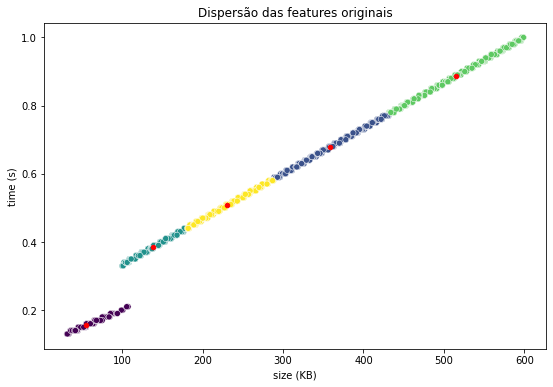

In [138]:
plt.figure(figsize=(9,6))
sns.scatterplot('size', 'time', data=sample2, c=clusters_vec2[2])
plt.scatter(centroids_originais2[:,0], centroids_originais2[:,1], s=20, c='red')
plt.title('Dispersão das features originais')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

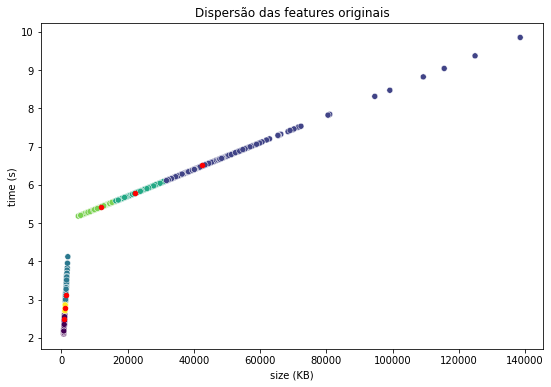

In [139]:
plt.figure(figsize=(9,6))
sns.scatterplot('size', 'time', data=sample3, c=clusters_vec3[3])
plt.scatter(centroids_originais3[:,0], centroids_originais3[:,1], s=20, c='red')
plt.title('Dispersão das features originais')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

### nomeando os centróides

Text(0, 0.5, 'time (s)')

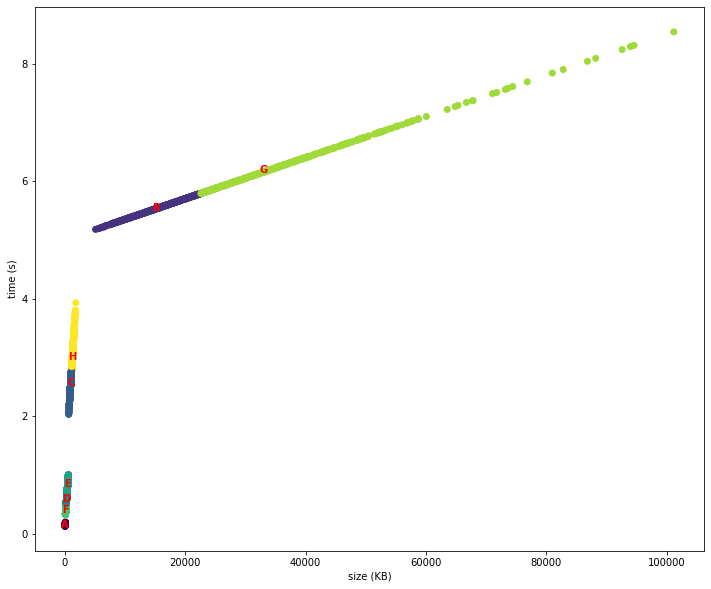

In [ ]:
plt.figure(figsize=(12,10))
groups = {'A': (5.49128831e+01, 1.55535543e-01),
         'B': (1.51548152e+04, 5.55139395e+00),
         'C': (9.81470205e+02, 2.57307813e+00),
         'D': (2.90086666e+02, 5.88528175e-01),
         'E': (4.86569217e+02, 8.50022572e-01),
         'F': (1.53444949e+02, 4.06934193e-01),
         'G': (3.30255978e+04, 6.19843342e+00),
         'H': (1.24867211e+03, 3.00044998e+00)}

for label,values in zip(groups.keys(),groups.values()):
  plt.annotate(label, 
               xy=(values[0],values[1]), 
               xytext=(values[0],values[1]), 
               size=10, 
               weight='bold', 
               color='red', 
               horizontalalignment='center',
               verticalalignment='center')
plt.scatter('size', 'time', data=sample, c=clusters_vec[5])
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

### sumarização dos clusters

In [ ]:
centroids_originais

array([[5.49128831e+01, 1.55535543e-01],
       [1.51548152e+04, 5.55139395e+00],
       [9.81470205e+02, 2.57307813e+00],
       [2.90086666e+02, 5.88528175e-01],
       [4.86569217e+02, 8.50022572e-01],
       [1.53444949e+02, 4.06934193e-01],
       [3.30255978e+04, 6.19843342e+00],
       [1.24867211e+03, 3.00044998e+00]])

In [ ]:
 for i in range(8):
  print(10 ** (((centroids_vec[5][i][0]) * df_cluster[['size','time']].std()['size']) + df_cluster[['size','time']].mean()['size']))
  print(sum(kmeans_vec[5].labels_==i))
  print('\n')

54.91288307668778
795


15154.815204610137
595


981.4702051708349
2497


290.0866655189409
1042


486.5692165626438
1397


153.4449493090825
789


33025.59780100349
614


1248.6721143251436
2271




In [ ]:
clusterA = sample[kmeans_vec[5].labels_==0]
clusterB = sample[kmeans_vec[5].labels_==1]
clusterC = sample[kmeans_vec[5].labels_==2]
clusterD = sample[kmeans_vec[5].labels_==3]
clusterE = sample[kmeans_vec[5].labels_==4]
clusterF = sample[kmeans_vec[5].labels_==5]
clusterG = sample[kmeans_vec[5].labels_==6]
clusterH = sample[kmeans_vec[5].labels_==7]


In [ ]:
# for c in range(0, 8):
#   print("\n\nCluster %i\n" % (c+1))
#   print(sample[kmeans_vec[5].labels_==c].describe())

In [ ]:
print(clusterA.describe())
print('\n')
print('Variancia')
print(clusterA.var())
print('\n')
print('CV')
print(clusterA.std()/clusterA.mean())
print('\n')
print('soma')
print(clusterA.sum())
print('\n')
print('range')
print(clusterA.max()-clusterA.min())

        type        size        time
count  795.0  795.000000  795.000000
mean     0.0   55.976679    0.155950
std      0.0   10.969859    0.011198
min      0.0   29.780000    0.130000
25%      0.0   48.280000    0.150000
50%      0.0   55.150000    0.160000
75%      0.0   62.680000    0.160000
max      0.0   96.490000    0.200000


Variancia
type      0.000000
size    120.337803
time      0.000125
dtype: float64


CV
type         NaN
size    0.195972
time    0.071803
dtype: float64


soma
type        0.00
size    44501.46
time      123.98
dtype: float64


range
type     0.00
size    66.71
time     0.07
dtype: float64


In [ ]:
print(clusterB.describe())
print('\n')
print('Variancia')
print(clusterB.var())
print('\n')
print('CV')
print(clusterB.std()/clusterB.mean())
print('\n')
print('soma')
print(clusterB.sum())
print('\n')
print('range')
print(clusterB.max()-clusterB.min())

        type          size        time
count  595.0    595.000000  595.000000
mean     1.0  15720.790101    5.550235
std      0.0   4196.632425    0.147087
min      1.0   5107.270000    5.180000
25%      1.0  12552.375000    5.440000
50%      1.0  16003.710000    5.560000
75%      1.0  19219.905000    5.670000
max      1.0  22406.220000    5.780000


Variancia
type    0.000000e+00
size    1.761172e+07
time    2.163462e-02
dtype: float64


CV
type    0.000000
size    0.266948
time    0.026501
dtype: float64


soma
type        595.00
size    9353870.11
time       3302.39
dtype: float64


range
type        0.00
size    17298.95
time        0.60
dtype: float64


In [ ]:
print(clusterC.describe())
print('\n')
print('Variancia')
print(clusterC.var())
print('\n')
print('CV')
print(clusterC.std()/clusterC.mean())
print('\n')
print('soma')
print(clusterC.sum())
print('\n')
print('range')
print(clusterC.max()-clusterC.min())

         type         size         time
count  2497.0  2497.000000  2497.000000
mean      1.0   983.844726     2.574121
std       0.0    87.175426     0.139534
min       1.0   646.850000     2.030000
25%       1.0   926.380000     2.480000
50%       1.0   998.710000     2.600000
75%       1.0  1053.360000     2.690000
max       1.0  1109.270000     2.770000


Variancia
type       0.000000
size    7599.554834
time       0.019470
dtype: float64


CV
type    0.000000
size    0.088607
time    0.054206
dtype: float64


soma
type       2497.00
size    2456660.28
time       6427.58
dtype: float64


range
type      0.00
size    462.42
time      0.74
dtype: float64


In [ ]:
print(clusterD.describe())
print('\n')
print('Variancia')
print(clusterD.var())
print('\n')
print('CV')
print(clusterD.std()/clusterD.mean())
print('\n')
print('soma')
print(clusterD.sum())
print('\n')
print('range')
print(clusterD.max()-clusterD.min())

         type         size         time
count  1042.0  1042.000000  1042.000000
mean      0.0   294.005758     0.591987
std       0.0    47.607565     0.063610
min       0.0   214.000000     0.490000
25%       0.0   252.000000     0.540000
50%       0.0   295.000000     0.590000
75%       0.0   333.000000     0.640000
max       0.0   378.000000     0.700000


Variancia
type       0.000000
size    2266.480274
time       0.004046
dtype: float64


CV
type         NaN
size    0.161927
time    0.107453
dtype: float64


soma
type         0.00
size    306354.00
time       616.85
dtype: float64


range
type      0.00
size    164.00
time      0.21
dtype: float64


In [ ]:
print(clusterE.describe())
print('\n')
print('Variancia')
print(clusterE.var())
print('\n')
print('CV')
print(clusterE.std()/clusterE.mean())
print('\n')
print('soma')
print(clusterE.sum())
print('\n')
print('range')
print(clusterE.max()-clusterE.min())

         type         size         time
count  1397.0  1397.000000  1397.000000
mean      0.0   490.637795     0.854159
std       0.0    62.655690     0.083486
min       0.0   379.000000     0.710000
25%       0.0   436.000000     0.780000
50%       0.0   493.000000     0.860000
75%       0.0   544.000000     0.930000
max       0.0   599.000000     1.000000


Variancia
type       0.000000
size    3925.735476
time       0.006970
dtype: float64


CV
type         NaN
size    0.127703
time    0.097740
dtype: float64


soma
type         0.00
size    685421.00
time      1193.26
dtype: float64


range
type      0.00
size    220.00
time      0.29
dtype: float64


In [ ]:
print(clusterF.describe())
print('\n')
print('Variancia')
print(clusterF.var())
print('\n')
print('CV')
print(clusterF.std()/clusterF.mean())
print('\n')
print('soma')
print(clusterF.sum())
print('\n')
print('range')
print(clusterF.max()-clusterF.min())

        type        size        time
count  789.0  789.000000  789.000000
mean     0.0  157.003802    0.409328
std      0.0   32.872986    0.043852
min      0.0  100.000000    0.330000
25%      0.0  128.000000    0.370000
50%      0.0  157.000000    0.410000
75%      0.0  185.000000    0.450000
max      0.0  213.000000    0.480000


Variancia
type       0.000000
size    1080.633234
time       0.001923
dtype: float64


CV
type         NaN
size    0.209377
time    0.107132
dtype: float64


soma
type         0.00
size    123876.00
time       322.96
dtype: float64


range
type      0.00
size    113.00
time      0.15
dtype: float64


In [ ]:
print(clusterG.describe())
print('\n')
print('Variancia')
print(clusterG.var())
print('\n')
print('CV')
print(clusterG.std()/clusterG.mean())
print('\n')
print('soma')
print(clusterG.sum())
print('\n')
print('range')
print(clusterG.max()-clusterG.min())

        type           size        time
count  614.0     614.000000  614.000000
mean     1.0   34459.612443    6.206189
std      0.0   11961.923371    0.418758
min      1.0   22464.450000    5.790000
25%      1.0   25934.767500    5.910000
50%      1.0   30995.455000    6.085000
75%      1.0   38900.497500    6.360000
max      1.0  101190.040000    8.540000


Variancia
type    0.000000e+00
size    1.430876e+08
time    1.753584e-01
dtype: float64


CV
type    0.000000
size    0.347129
time    0.067474
dtype: float64


soma
type         614.00
size    21158202.04
time        3810.60
dtype: float64


range
type        0.00
size    78725.59
time        2.75
dtype: float64


In [ ]:
print(clusterH.describe())
print('\n')
print('Variancia')
print(clusterH.var())
print('\n')
print('CV')
print(clusterH.std()/clusterH.mean())
print('\n')
print('soma')
print(clusterH.sum())
print('\n')
print('range')
print(clusterH.max()-clusterH.min())

         type         size         time
count  2271.0  2271.000000  2271.000000
mean      1.0  1251.366187     3.002219
std       0.0   115.026059     0.184047
min       1.0  1109.580000     2.780000
25%       1.0  1161.920000     2.860000
50%       1.0  1224.260000     2.960000
75%       1.0  1312.145000     3.100000
max       1.0  1832.240000     3.930000


Variancia
type        0.000000
size    13230.994163
time        0.033873
dtype: float64


CV
type    0.000000
size    0.091920
time    0.061304
dtype: float64


soma
type       2271.00
size    2841852.61
time       6818.04
dtype: float64


range
type      0.00
size    722.66
time      1.15
dtype: float64


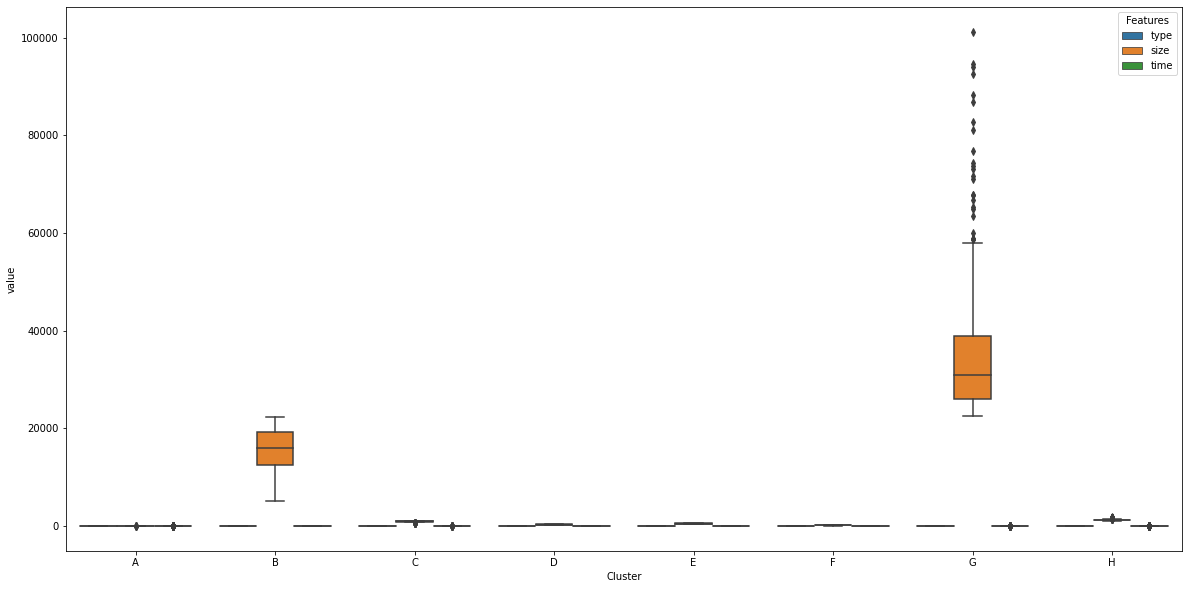

In [ ]:
dfA=clusterA.assign(Cluster='A')
dfB=clusterB.assign(Cluster='B')
dfC=clusterC.assign(Cluster='C')
dfD=clusterD.assign(Cluster='D')
dfE=clusterE.assign(Cluster='E')
dfF=clusterF.assign(Cluster='F')
dfG=clusterG.assign(Cluster='G')
dfH=clusterH.assign(Cluster='H')

dfs = pd.concat([dfA, dfB, dfC, dfD, dfE, dfF, dfG, dfH])
all_dfs = pd.melt(dfs, id_vars=['Cluster'] , var_name='Features')
plt.figure(figsize=(20,10))
sns.boxplot(x='Cluster', y='value', hue='Features', data=all_dfs)
plt.show()